## Decision Tree Classifier for Breast Cancer Prediction 
The dataset is available for download at: 
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
The dataset that is going to be used is already processed(standardised) and is ready for machine learning algorithm. We are going to use Decision Tree Classifier for our binary classification task. 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import accuracy_score


In [61]:
# load dataset
df = pd.read_csv('data_bcw.csv')
df.head()
# Column 'diagnosis' contains the labels
# label 0 denotes 'benign'
# label 1.0 denotes 'malignant'

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1.0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1.0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1.0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1.0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1.0


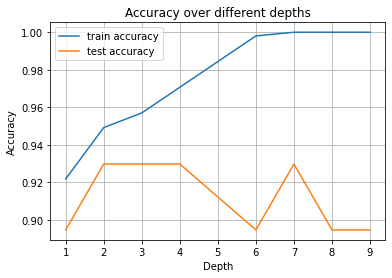

In [80]:
# features & labels
X = df.drop(columns = ['diagnosis'])
y = df['diagnosis']

# Converting to NumPy arrays
X = X.to_numpy()
y = y.to_numpy()

# Splitting into train, test set
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_index in sss.split(X,y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index] 


# train and test accuracy at different depth
train_acc, test_acc = [],[]
for depth in range(1,10):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train, y_train)
    y_train_pred = tree_clf.predict(X_train)
    y_test_pred = tree_clf.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    
#
fig, ax = plt.subplots()
_ = ax.plot(range(1,10), train_acc, label = 'train accuracy')
_ = ax.plot(range(1,10),test_acc, label='test accuracy')
_ = ax.set_title('Accuracy over different depths')
_ = ax.set_xlabel('Depth')
_ = ax.set_ylabel('Accuracy')
_ = ax.legend()
_ = ax.grid(True)


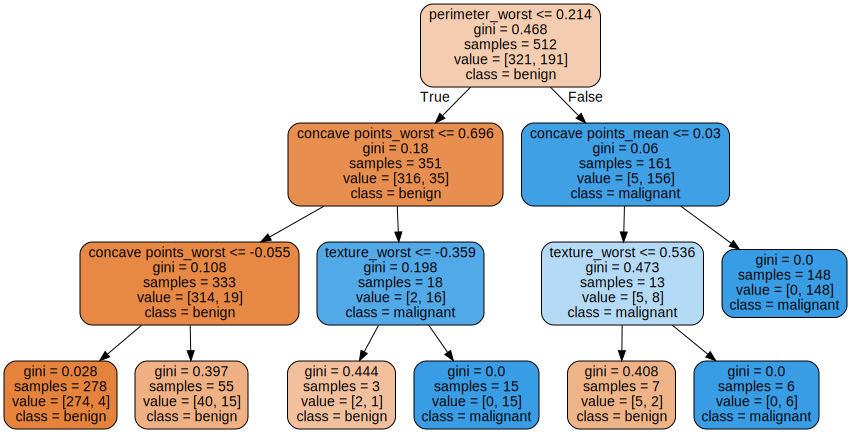

In [79]:
# Decision Tree Structure
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)

# to visualize bimary tree structure
export_graphviz(tree_clf,
            out_file= "img/bcw_tree.dot",
            feature_names=df.columns[:-1],
            class_names=['benign', 'malignant'],
            rounded=True,
            filled=True
            )


Source.from_file("img/bcw_tree.dot")